# Sujet de TP noté de deep learning (Groupe de 2)

In [1]:
#Verification des environements
###############################


import numpy as np
import os
# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
import glob
import os

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn import datasets

## Regression linéaire

Définition de plusieurs fonctions pour générer des données

In [2]:
## Calcul de  points de manière inconnue
def computePoints(m):
    X1 = 10*np.random.rand(m, 1) # m valeurs aléatoires de 0 à 10 
    X2 = 10*np.random.rand(m, 1) # m valeurs aléatoires de 0 à 10 
    y =4 + 2 * X1 + 3* X2 + 10*np.random.randn(m, 1) # m valeurs de y coorespondantes à x1 et x2
    return [X1,X2,y]

## Calcul de  points de manière inconnue
def computepolyPoints(m):  
    e=3
    n=3127
    d=2011
    X = 6 * np.random.rand(m, 1) - 3 # 200 valeurs aléatoires de -3 à +3
    y = 3 * 8*X*X*X*X+ 23*X*X*X+ X**2 + X + 4 + np.random.randn(m, 1) # 200 y coorespondants à x
    return [X,y]

# Fonction Sigmoid
def sig(t):
    return 1 / (1 + np.exp(-t))

## Calcul de  points de manière inconnue
def computeLogistic(m,n):
    val = 10*np.random.rand(n, 1) # m valeurs aléatoires de 0 à 10 
    X = 5*np.random.rand(m, n) # m valeurs aléatoires de 0 à 5
    y_temp=X.dot(val)
    maxi=max(y_temp)
    mini=min(y_temp)
    y_norm=10-(y_temp-mini)/(maxi-mini)*20
    y_proba=sig(y_norm)
    y=np.round(y_proba)
    return [X,y]

## Calcul de  points de manière inconnue
def computeSoftMax(m,n,k):
    #val = 10*np.random.rand(n, k) # m valeurs aléatoires de 0 à 10 
    X = 5*np.random.rand(m, n) # m valeurs aléatoires de 0 à 5
    y=0*np.random.rand(m, 1)
    for cpt in range(0, m): 
        classe=int(np.round(k*np.random.rand(1, 1)))
        y[cpt]=classe
    return [X,y]

### Exercice 1

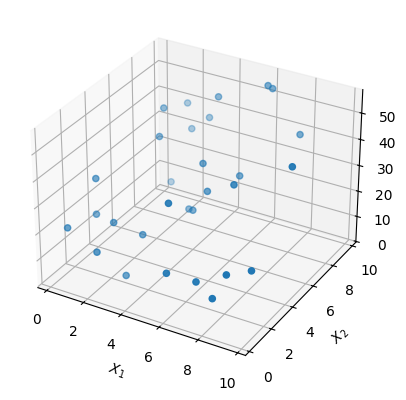

In [3]:

[X1,X2,y]=computePoints(30)

# importing mplot3d toolkits, numpy and matplotlib 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
#fig = plt.figure() 
mpl.rcParams['legend.fontsize'] = 10
  
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
  

# plotting 
ax.scatter(X1.flatten(),X2.flatten(),y.flatten());
plt.xlabel('$X_1$');
plt.ylabel('$X_2$');
ax.set_zlabel('y');

plt.show() 

Observer le nuage de point disponible [ici](https://seshat.gitlabpages.inria.fr/deeplearning/jupyterNotebook/TD1/ex1.html).

1. Quel type de modèle **géométrique** pourrait permettre de représenter ces données ? 
2. Combien a-t-il avoir de paramètres ?
3. Quelle est la solution la **plus précise et la plus rapide** pour trouver ces paramètres ? (justifier le choix)
4. combien valent **m** et **n** ?

### Exercice 2

- On a mesuré dans plusieurs académies de football plusieurs métriques à l'aide de **capteurs sur les chaussures** :
  - vitesse moyenne ($V_x, V_y$), accélération moyenne ($A_x, A_y$), position moyenne($P_x, P_y$)
  - Zones de présence ($Z \in \{1,2,3,4,5\}$)
  - Nombre de passes ($Np$)
  - Nombre de tirs ($Nt$)
  - Nombre de dribbles ($Nd$) 
  
- 563 joueurs ont été suivis dans leur carrière pour determiner la **longévité** $L$

**L'objectif est de définir un algorithme de regression linéaire pour prédire la longévité d'un nouvel arrivant**.

Pour construire le modèle :

5. Que représente **Y** ? Est-il connu ? Quelle est sa dimension ?
6. Que représente **X** ? Est-il connu ? Quelle est sa dimension ?
7. Que représente **$\theta$** (theta) ? Est-il connu ? Quelle est sa dimension ?

Une fois que le modèle est connu : 

8. Quel est l'**inconnu** pour prédire la longévité d'un nouvel arrivant, avec quelle dimension ?

Amélioration :

9. Si vous voulez proposer aux académies de football des idées pour **augmenter la précision** du modèle, que pouvez-vous leur demander de vous fournir ?

### Exercice 3

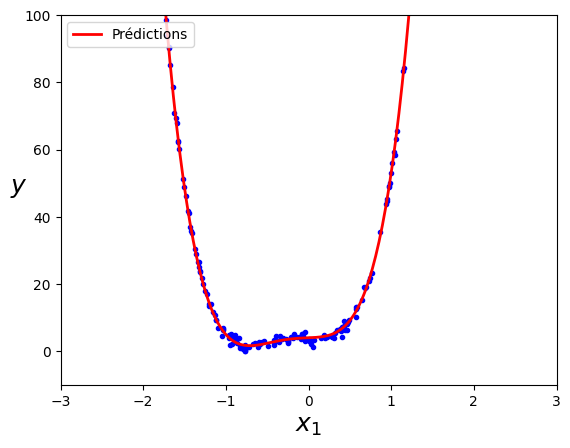

In [13]:
from sklearn.linear_model import LinearRegression
## Calcul et affichage des points
m=300
[X,y]=computepolyPoints(m)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-6, 6, -2, 100])

10. Effectuer une regression polynomiale et afficher le resultat

## Perceptron

In [9]:
import numpy as np
## Calcul de  points de manière inconnue
def computeFitnessData(n,k,mScale):
    m=k*mScale
    X = 0*np.random.rand(n, m)
    y = 0*np.random.rand(m)
    for j in range(0, n):     # 
        nums = []
        for cpt in range(0, k):     #  
            mu   = 100*np.random.rand() 
            sigma = 5*np.random.rand()
            for i in range(mScale):  # 2 lignes : m=k*100 mesures équilibrées
                temp = np.random.normal(mu, sigma) 
                nums.append(temp) # nums contient 100 valeurs dans la même zone
        X[j]=nums
    index=0    
    for j in range(0, k):     # 
        for cpt in range(0, mScale):
            y[index]=j
            index=index+1     
    return [np.transpose(X),y]    
#[X,y] = computeFitnessData(4,4,5)
#print(y)


## Calcul de  points de manière inconnue
def computePregnancy(n,m):
    if m % 2 == 1:
        print('m is not even')
        m=m-1
    X = 0*np.random.rand(n, m)
    y = 0*np.random.rand(m)
    for j in range(0, n):     # 
        nums = []
        for cpt in range(0, 2):     #  
            mu   = 100*np.random.rand() 
            sigma = 5*np.random.rand()
            for i in range(int(m/2)):
                temp = np.random.normal(mu, sigma) 
                nums.append(temp) 
        X[j]=nums
    index=0    
    for j in range(0, 2):     # 
        for cpt in range(0, int(m/2)):
            y[index]=j
            index=index+1     
    return [np.transpose(X),y]    
#[X,y] = computePregnancy(4,10)
#print(y)

## Calcul de  points de manière inconnue
def computeFGrad(m):
    X1 = 20*np.random.rand(m)
    X2 = 20*np.random.rand(m)    
    
    
    

### Exercice 4

- Application pour **montre connectée**
- Objectif : reconnaitre un **sport pratiqué**
- Idée : dès que **>100bbm** mesuré, prédire le sport en fonction des mesures :
  - 50 mesures données par l'application
  - Choisir parmi 4 sports
- Fonction enregistrement : l'utilisateur définit le sport qu'il est en train de faire
  - 480 activités ainsi enregistrées


In [26]:
k=4;
n=50;
mScale=120
m=k*mScale
[X,y] = computeFitnessData(n,k,mScale)   

11. Quelles sont les Dimensions de X et y ?
12. Donner le code pour découper les données en données d'entrainement et donnes de validation :
`X_train_ful`,`X_test`,`Y_train_full`,`Y_test`

Nous allons utiliser le module :

In [27]:
from sklearn.linear_model import Perceptron

13. Modéliser l'architecture du réseau de neurone (une ligne de code avec les bons hyperparamètres)

14. Lancer l'entraînement du réseau de neuronnes (une ligne de code)

15. Effectuer les tests(une ligne de code)

16. Faire la même chose avec un avec un perceptron multicouche avec les spécifications suivantes :
Architecture :
    - **Architecture :**  
       - Modèle `Sequential`.  
       - 4 couches denses avec les paramètres suivants :  
         - 1ère couche : **5 neurones**, activation **ReLU**.  
         - 2ᵉ couche : **50 neurones**, activation **ReLU**.  
         - 3ᵉ couche : **10 neurones**, activation **ReLU**.  
         - 4ᵉ couche (sortie) : **2 neurones**, activation **softmax**.  

    - **Compilation :**  
       - Optimiseur : **Adam**.  
       - Perte : **Sparse categorical crossentropy**. 

17. Entrainer le modèle et afficher la courbe

### Exercice 5

In [30]:
import tensorflow as tf

In [35]:
[Xtemp,ytemp] = computePregnancy(500,300)

- IA pour détecter une grossesse
- Pour une enseigne de supermarché
- Un ensemble d'information est collecté grâce à la carte de fidélité enregistrant les achats (500)
- Chez 300 clients, l'enseigne a su qu'il y avait eu une grossesse ou pas


18. Que valent $n$ et $m$ ?
19. Où sont $X$, $\Theta$ et $y$
20. Quel est l'**inconnu** pour construire le modèle ?
21. Quelle **architecture** allons nous utiliser ?
22. Combien de **classes** ?

23. Découper les données

24. Modéliser l'architecture du réseau de neurone 

25. Lancer l'entraînement du réseau de neuronnes

26. Effectuer des tests